# Regression between sea level height and the dangendorf wind proxies for observational data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Analysis/code')

import import_data as imprt
import regression as regres
import figures as figs

data_type = 'era5'
model = 'Dangendorf'

#### Import and plot tide gauge data

In [2]:
# Open data file
tg_data = imprt.import_obs_slh_data()

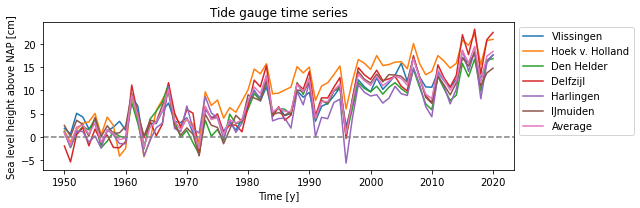

In [3]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [4]:
pres_data_era5 = imprt.import_obs_wind_data(model = model, data_type = data_type)

In [5]:
pres_data_era5

,Negative corr region,Positive corr region
time,,
1950,100860.789062,101706.679688
1951,100909.242188,101633.406250
1952,100948.703125,101704.281250
1953,101167.054688,101741.234375
1954,100871.156250,101678.546875
...,...,...
2016,101106.015625,101755.867188
2017,100909.265625,101818.640625
2018,101164.859375,101647.007812


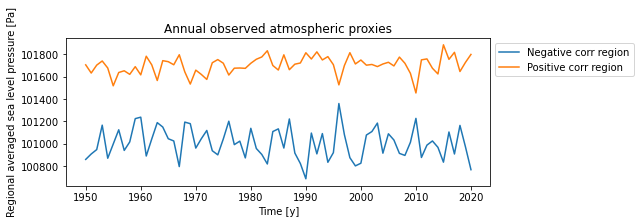

In [6]:
figs.plot_obs_pres_data(pres_data_era5, model, data_type)

### Perform regression

In [7]:
results_era5, timeseries_era5, significance_era5 = regres.regression_obs(pres_data_era5, tg_data, wind_model = model, data_type = data_type)

In [8]:
results_era5

,R$^2$,R$^2_{wind}$,R$^2_{neg}$,R$^2_{pos}$,RMSE,constant,Negative corr region,Positive corr region,trend
station,,,,,,,,,
Vlissingen,0.801600,0.248741,0.133054,0.254010,2.276742,7.348812,-0.681923,1.112722,3.911789
Hoek v. Holland,0.884070,0.254628,0.167607,0.258263,2.270442,9.960944,-1.357626,1.109602,5.413101
Den Helder,0.816029,0.396347,0.226339,0.389872,2.217856,6.357774,-0.967950,1.713029,3.449872
Delfzijl,0.825415,0.337329,0.187175,0.336460,2.798430,7.614678,-1.103294,1.920693,4.818281
Harlingen,0.795619,0.442750,0.319556,0.403543,2.473186,5.832838,-1.732849,1.522820,3.327244
IJmuiden,0.793103,0.333692,0.181379,0.332945,2.364913,7.142322,-0.809356,1.533373,3.631033
Average,0.863345,0.348896,0.209860,0.344622,2.052195,7.376228,-1.108833,1.485373,4.091887


In [9]:
timeseries_era5

Vlissingen                                                      \
     Negative corr region Positive corr region     trend     total wind total   
time                                                                            
1950             0.731446             0.056517 -6.680651 -5.892688   0.787963   
1951             0.489053            -0.980834 -6.489775 -6.981556  -0.491781   
1952             0.291644             0.022562 -6.298899 -5.984693   0.314206   
1953            -0.800688             0.545716 -6.108024 -6.362995  -0.254972   
1954             0.679583            -0.341766 -5.917148 -5.579331   0.337816   
...                   ...                  ...       ...       ...        ...   
2016            -0.495332             0.752877  5.917148  6.174692   0.257545   
2017             0.488936             1.641576  6.108024  8.238535   2.130512   
2018            -0.789706            -0.788273  6.298899  4.720921  -1.577979   
2019             0.169471             0.365543  6.489775  7.024789   0.535014   
2020             1.191766             1.375796  6.680651  9.248213   2.567562   

          Hoek v. Holland                                            \
     Negative corr region Positive corr region     trend      total   
time                                                                  
1950             1.456221             0.056358 -9.244630  -7.732051   
1951             0.973645            -0.978083 -8.980498  -8.984935   
1952             0.580629             0.022498 -8.716365  -8.113238   
1953            -1.594073             0.544186 -8.452233  -9.502120   
1954             1.352967            -0.340808 -8.188101  -7.175941   
...                   ...                  ...       ...        ...   
2016            -0.986146             0.750765  8.188101   7.952720   
2017             0.973412             1.636973  8.452233  11.062618   
2018            -1.572209            -0.786062  8.716365   6.358094   
2019             0.337396             0.364518  8.980498   9.682412   
2020             2.372663             1.371938  9.244630  12.989231   

                 ...             IJmuiden                                 \
     wind total  ... Negative corr region Positive corr region     trend   
time             ...                                                       
1950   1.512579  ...             0.868133             0.077882 -6.201169   
1951  -0.004438  ...             0.580444            -1.351626 -6.023992   
1952   0.603127  ...             0.346145             0.031091 -5.846816   
1953  -1.049887  ...            -0.950315             0.752018 -5.669640   
1954   1.012159  ...             0.806578            -0.470967 -5.492464   
...         ...  ...                  ...                  ...       ...   
2016  -0.235381  ...            -0.587896             1.037493  5.492464   
2017   2.610385  ...             0.580304             2.262154  5.669640   
2018  -2.358271  ...            -0.937280            -1.086270  5.846816   
2019   0.701914  ...             0.201140             0.503732  6.023992   
2020   3.744601  ...             1.414475             1.895899  6.201169   

                                       Average                                 \
         total wind total Negative corr region Positive corr region     trend   
time                                                                            
1950 -5.255153   0.946016             1.189360             0.075444 -6.988227   
1951 -6.795175  -0.771183             0.795219            -1.309315 -6.788563   
1952 -5.469581   0.377235             0.474225             0.030117 -6.588899   
1953 -5.867937  -0.198297            -1.301950             0.728477 -6.389236   
1954 -5.156853   0.335611             1.105028            -0.456224 -6.189572   
...        ...        ...                  ...                  ...       ...   
2016  5.942060   0.449597            -0.805429             1.005015  6.189572   
2017  8.51

In [10]:
significance_era5

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
Negative corr region,True,True,True,True,True,True,True
Positive corr region,True,True,True,True,True,True,True
trend,True,True,True,True,True,True,True
total,True,True,True,True,True,True,True
wind total,True,True,True,True,True,True,True


#### Plot regression results

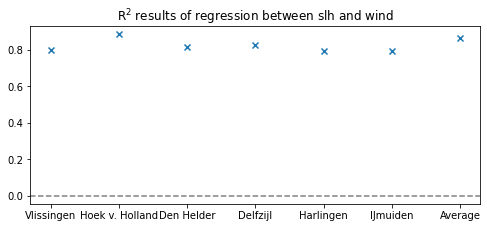

In [11]:
figs.plot_obs_result_per_station(results_era5, 'R$^2$', model, data_type)

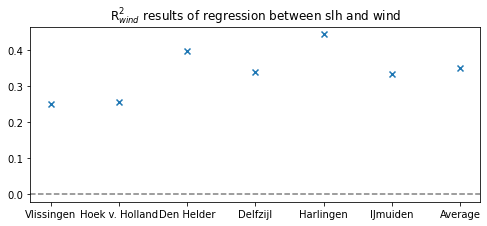

In [12]:
figs.plot_obs_result_per_station(results_era5, 'R$^2_{wind}$', model, data_type)

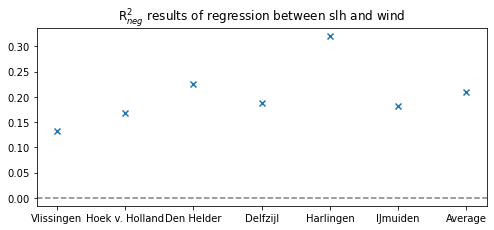

In [13]:
figs.plot_obs_result_per_station(results_era5,'R$^2_{neg}$', model, data_type)

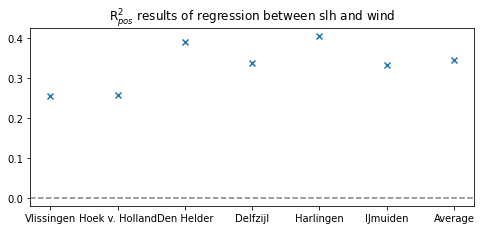

In [14]:
figs.plot_obs_result_per_station(results_era5, 'R$^2_{pos}$', model, data_type)

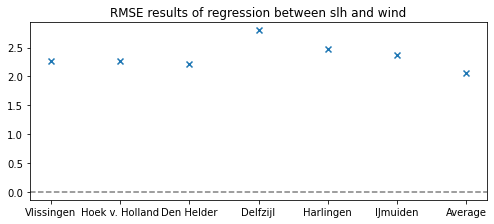

In [15]:
figs.plot_obs_result_per_station(results_era5, 'RMSE', model, data_type)

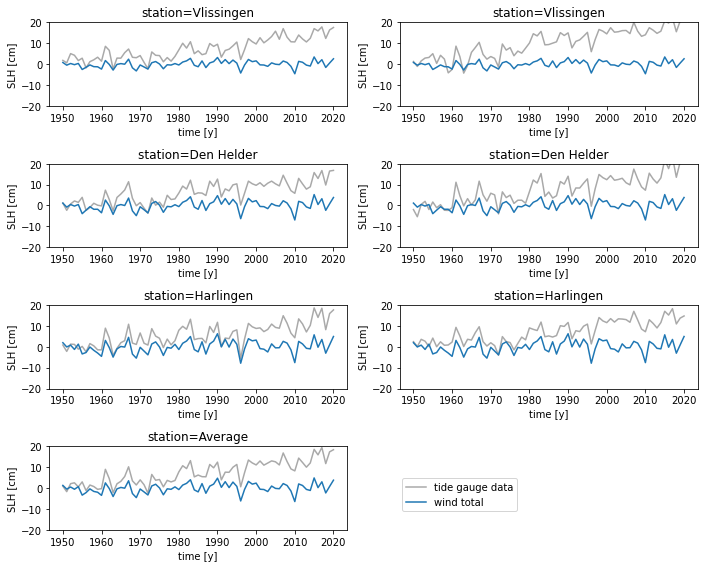

In [16]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['wind total'], model, data_type)

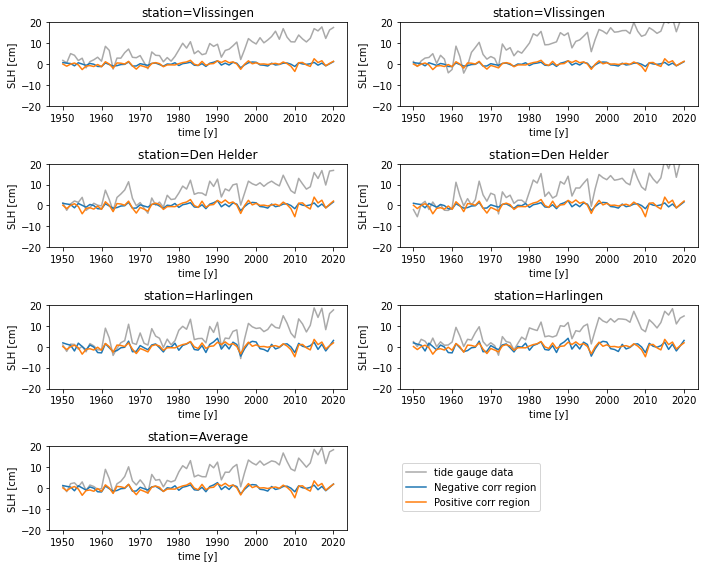

In [17]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['Negative corr region', 'Positive corr region'], model, data_type)

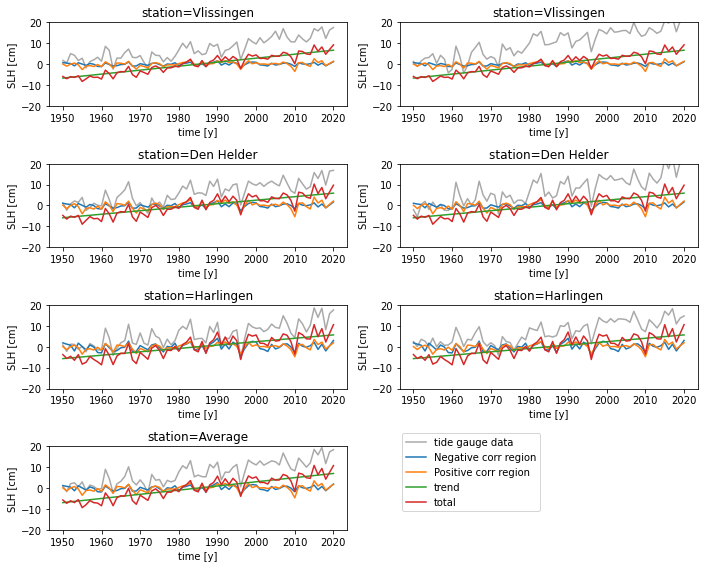

In [18]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['Negative corr region', 'Positive corr region', 'trend', 'total'], model, data_type)

#### Plot trends

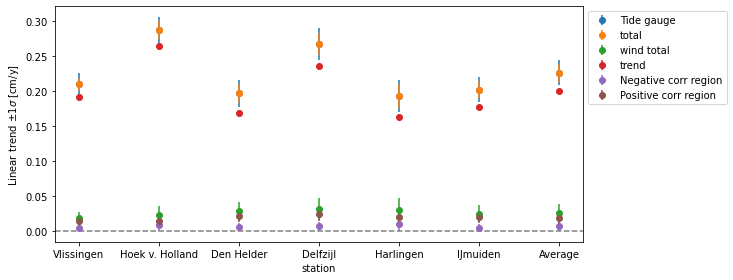

In [19]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'trend', 'Negative corr region', 
                                                                  'Positive corr region'], model, data_type)

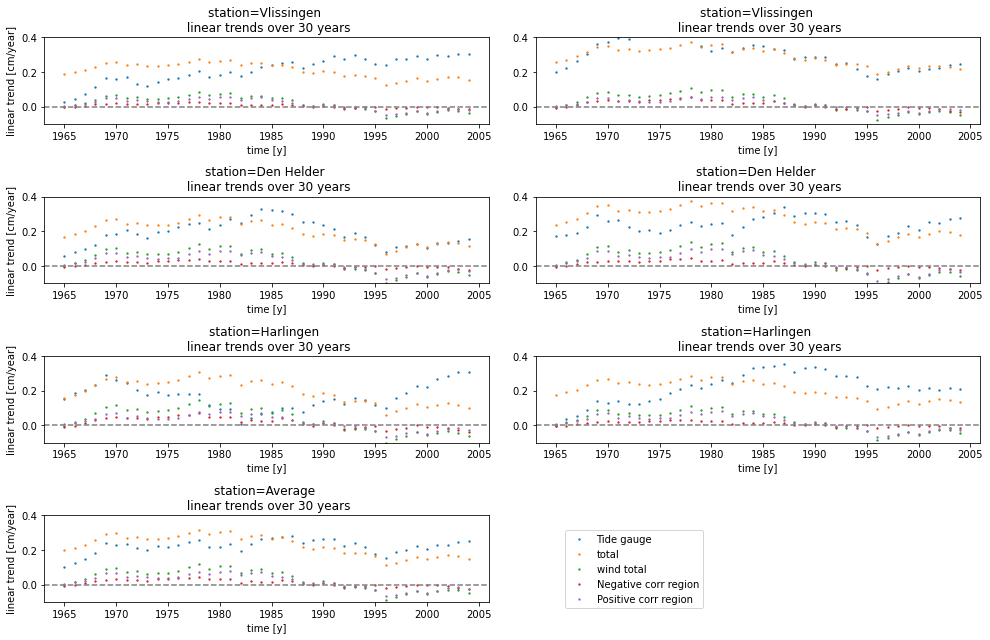

In [20]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'Negative corr region', 'Positive corr region'], 30, model, data_type, errorbar = False)

## 20cr observational data

In [21]:
data_type = '20cr'

#### Import and plot tide gauge data

In [22]:
# Open data file
tg_data = imprt.import_obs_slh_data(data_type = data_type)

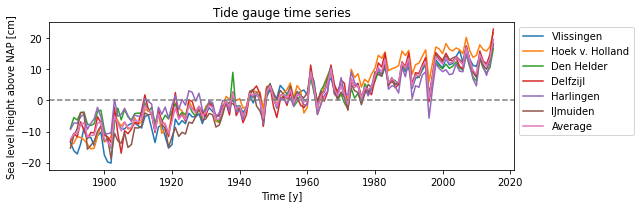

In [23]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [24]:
pres_data_20cr = imprt.import_obs_wind_data(model = model, data_type = data_type)

In [25]:
pres_data_20cr

,Negative corr region,Positive corr region
time,,
1836,101064.242188,101597.820312
1837,101291.820312,101556.539062
1838,101406.742188,101439.625000
1839,101359.046875,101497.085938
1840,101235.304688,101528.015625
...,...,...
2011,100897.171875,101706.281250
2012,100989.507812,101700.765625
2013,101064.007812,101671.875000


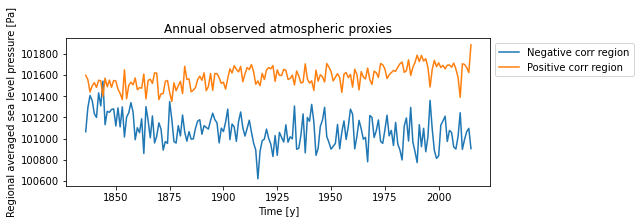

In [26]:
figs.plot_obs_pres_data(pres_data_20cr, model, data_type)

### Perform regression

In [27]:
results_20cr, timeseries_20cr, significance_20cr = regres.regression_obs(pres_data_20cr, tg_data, wind_model = model, data_type = data_type)

In [28]:
results_20cr

,R$^2$,R$^2_{wind}$,R$^2_{neg}$,R$^2_{pos}$,RMSE,constant,Negative corr region,Positive corr region,trend
station,,,,,,,,,
Vlissingen,0.904248,0.182003,0.044584,0.236810,2.729490,-6.029036,-0.646293,0.844321,11.355157
Hoek v. Holland,0.932644,0.223751,0.069514,0.281971,2.482034,-4.509312,-1.117425,1.269627,12.145613
Den Helder,0.845510,0.294220,0.114543,0.331725,2.616292,-3.255731,-1.212873,1.366409,7.452875
Delfzijl,0.870082,0.287666,0.109856,0.329436,3.013295,-4.701607,-1.469562,1.634967,9.617375
Harlingen,0.847361,0.413372,0.190309,0.422040,2.444186,-2.800588,-1.645673,1.850786,6.214654
IJmuiden,0.878399,0.104273,0.073514,0.216421,3.072274,-6.086749,-1.468314,0.268283,11.248921
Average,0.920208,0.249446,0.094608,0.306994,2.223293,-4.563837,-1.260023,1.205732,9.672432


In [29]:
timeseries_20cr

Vlissingen                                             \
     Negative corr region Positive corr region      trend      total   
time                                                                   
1836             0.052676             0.121991 -19.558745 -19.384079   
1837            -0.946022            -0.247233 -19.340212 -20.533467   
1838            -1.450342            -1.292925 -19.121678 -21.864945   
1839            -1.241037            -0.778988 -18.903145 -20.923170   
1840            -0.698010            -0.502350 -18.684611 -19.884971   
...                   ...                  ...        ...        ...   
2011             0.785843             1.092077  18.684611  20.562530   
2012             0.380638             1.042744  18.903145  20.326527   
2013             0.053704             0.784344  19.121678  19.959726   
2014            -0.087581             0.353350  19.340212  19.605980   
2015             0.754884             2.698941  19.558745  23.012570   

                     Hoek v. Holland                                  \
     wind total Negative corr region Positive corr region      trend   
time                                                                   
1836   0.174666             0.091075             0.183441 -20.920270   
1837  -1.193255            -1.635650            -0.371771 -20.686524   
1838  -2.743267            -2.507607            -1.944203 -20.452778   
1839  -2.020025            -2.145724            -1.171384 -20.219032   
1840  -1.200360            -1.206843            -0.755396 -19.985286   
...         ...                  ...                  ...        ...   
2011   1.877919             1.358703             1.642183  19.985286   
2012   1.423382             0.658114             1.568001  20.219032   
2013   0.838048             0.092853             1.179437  20.452778   
2014   0.265769            -0.151425             0.531341  20.686524   
2015   3.453825             1.305176             4.058466  20.920270   

                            ...             IJmuiden                       \
          total wind total  ... Negative corr region Positive corr region   
time                        ...                                             
1836 -20.645755   0.274516  ...             0.119674             0.038763   
1837 -22.693944  -2.007420  ...            -2.149269            -0.078558   
1838 -24.904588  -4.451810  ...            -3.295035            -0.410826   
1839 -23.536140  -3.317108  ...            -2.819515            -0.247523   
1840 -21.947525  -1.962239  ...            -1.585811            -0.159621   
...         ...        ...  ...                  ...                  ...   
2011  22.986172   3.000886  ...             1.785357             0.347007   
2012  22.445147   2.226115  ...             0.864772             0.331332   
2013  21.725069   1.272291  ...             0.122011             0.249225   
2014  21.066440   0.379916  ...            -0.198975             0.112277   
2015  26.283912   5.363642  ...             1.715022             0.857588   

                                                   Average  \
          trend      total wind total Negative corr region   
time                                                         
1836 -19.375759 -19.217322   0.158437             0.102697   
1837 -19.159270 -21.387097  -2.227827            -1.844380   
1838 -18.942781 -22.648642  -3.705861            -2.827611   
1839 -18.726292 -21.793330  -3.067038            -2.419547   
1840 -18.509803 -20.255236  -1.745433            -1.360852   
...         ...        ...        ...                  ...   
2011  18.509803  20.642167   2.132364             1.532092   
2012  18.726292  19.922396   1.196104             0.742098   
2013  18.942781  19.314017   0.371236             0.104703   
2014  19.159270  19.072572  -0.086698            -0.170749   
2015  19.375759  21.948369   2.572610             1.471734   

                                                 

In [30]:
significance_20cr

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
Negative corr region,True,True,True,True,True,True,True
Positive corr region,True,True,True,True,True,True,True
trend,True,True,True,True,True,True,True
total,True,True,True,True,True,True,True
wind total,True,True,True,True,True,True,True


#### Plot regression results

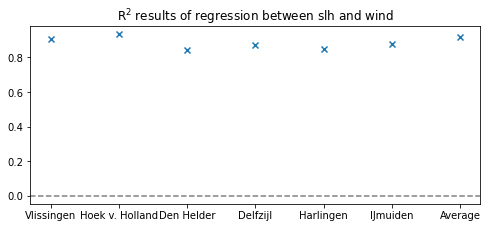

In [31]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2$', model, data_type)

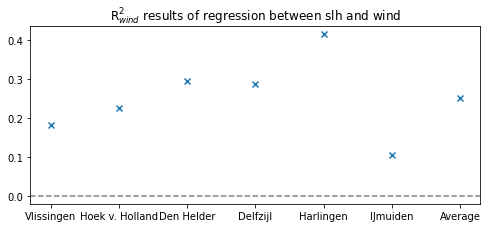

In [32]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2_{wind}$', model, data_type)

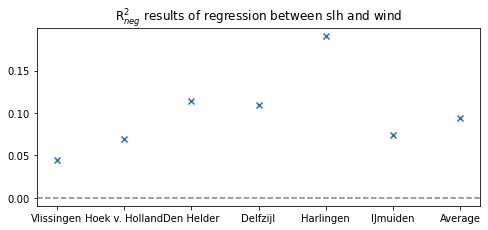

In [33]:
figs.plot_obs_result_per_station(results_20cr,'R$^2_{neg}$', model, data_type)

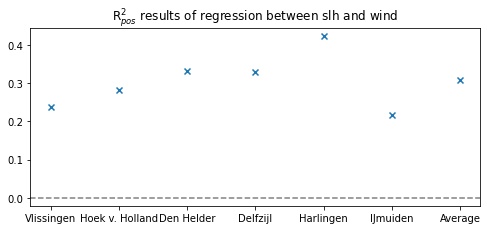

In [34]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2_{pos}$', model, data_type)

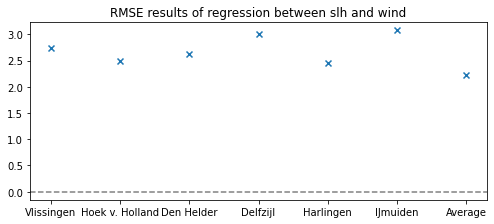

In [35]:
figs.plot_obs_result_per_station(results_20cr, 'RMSE', model, data_type)

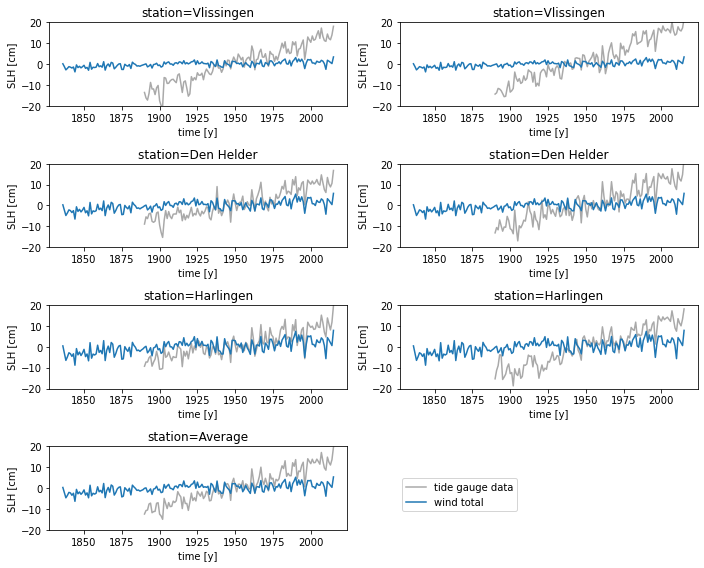

In [36]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['wind total'], model, data_type)

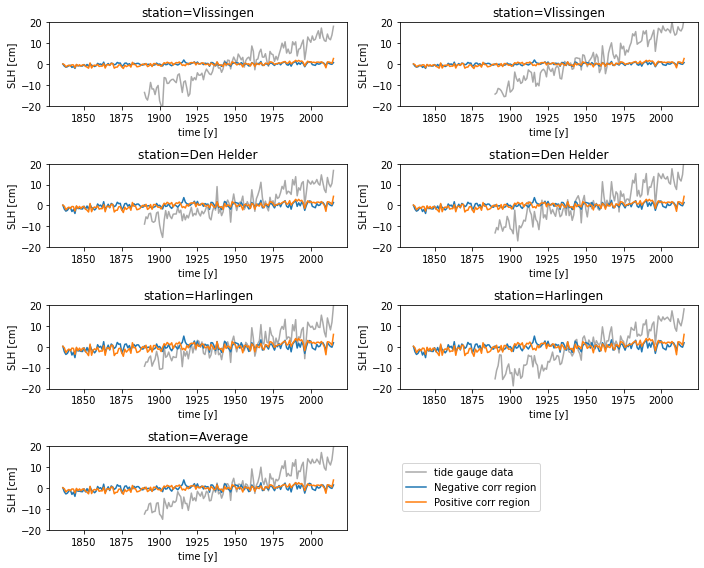

In [37]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['Negative corr region', 'Positive corr region'], model, data_type)

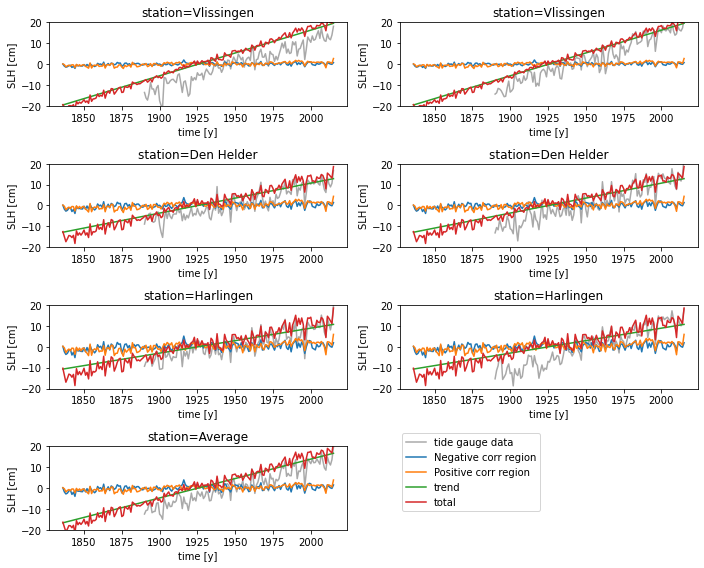

In [38]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['Negative corr region', 'Positive corr region', 'trend', 'total'], model, data_type)

#### Plot trends

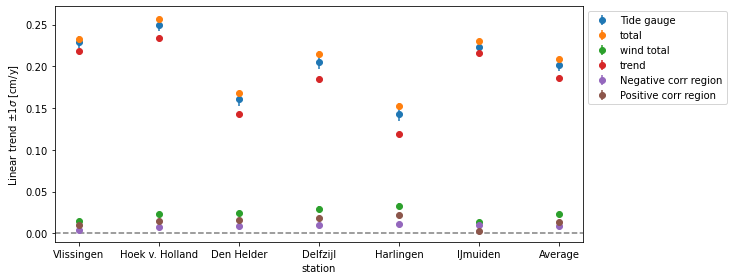

In [39]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'trend', 'Negative corr region', 
                                                                  'Positive corr region'], model, data_type)

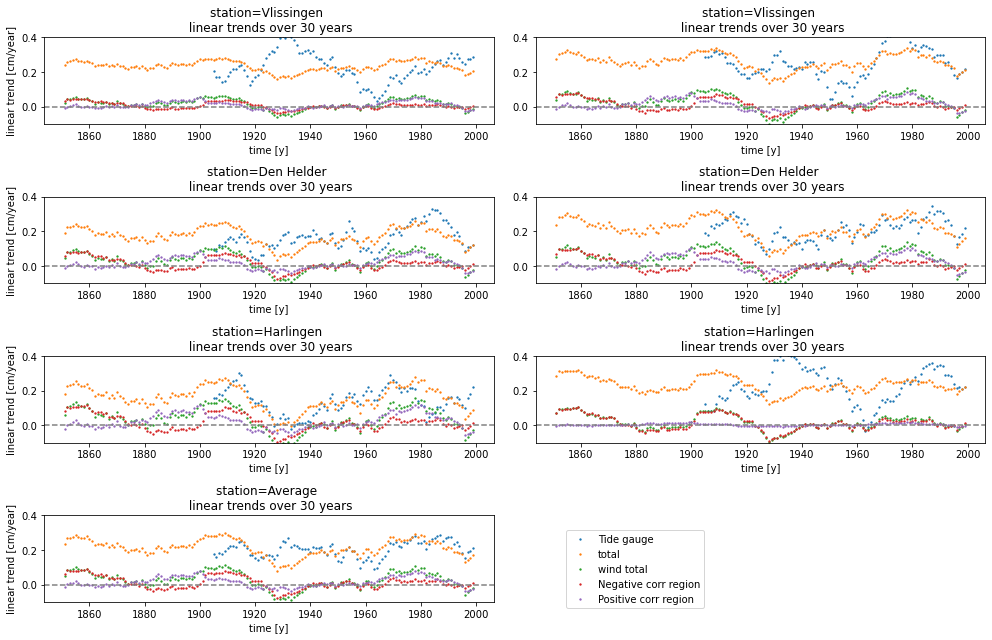

In [40]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'Negative corr region', 'Positive corr region'], 30, model, data_type, errorbar = False)